# OUTLINE
    1.Generate data that isnt linearly seperable
    2.Train with SN  and see performance
    3.Write from scratch our first feed forward network
    4.Train the FF on the data and compare it with SN
    5.Write a generic class for a FF network
    6.Train generic class on Binary Classification
    7.Generate data for multi-class classification
    8.Train a FF for 7
    9.Use softmax as the output layer and cross-entropy loss function
    10.Train with 8 for multi-class classification
    11.Excercises on other datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self,x):
        return (np.dot(x,self.w.T) + self.b)
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w_mse(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b_mse(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) 
    
    def grad_w_ce(self,x , y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1-y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
    
    def grad_b_ce(self,x , y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred
        elif y == 1:
            return -1 * (1-y_pred) 
        else:
            raise ValueError("y should be 0 or 1")
    
    def fit(self, X, Y, epochs =1, learning_rate =1, initialise = True,loss_fn = "mse", display_loss = False):
        if initialise:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0
        if display_loss:
            loss = []
        
        for i in tqdm(range(epochs), total = epochs, unit = 'epoch'):
            dw = 0 
            db = 0
            for x,y in zip(X,Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x,y)
                    db += self.grad_b_mse(x, y)
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
            
            m = X.shape[1]
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m   
            
            if display_loss:
                Y_pred  = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss.append(mean_squared_error(Y,Y_pred))
                elif loss_fn == "ce":
                    loss.append(log_loss(Y, Y_pred))
            
            if display_loss:
                plt.plot(loss)
                plt.xlabel("Epochs")
                if loss_fn == "mse":
                    plt.ylabel("Mean Squared Error")
                elif loss_fn == "ce":
                    plt.ylabel("Log Loss")
                    
    def predict(self, X):
        Y_pred = []
        for x in X:
            Y_pred.append(self.sigmoid(self.perceptron(x)))
        return np.array(Y_pred)

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

# Generate Data

In [4]:
data , labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state= 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


A non linearly seperable data with 4 classses and 2 features and 1000 rows is created.

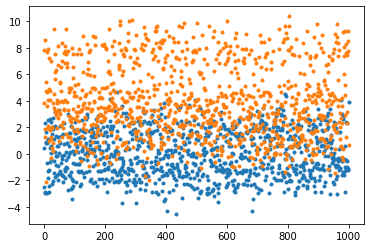

In [5]:
plt.plot(data,".")
plt.show()

### Scatter plot

data[:,0] means all row first column

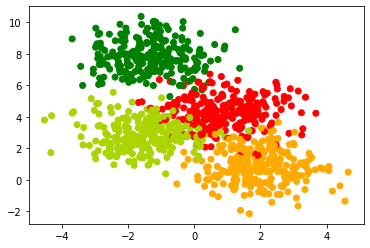

In [6]:
plt.scatter(data[:,0],data[:,1],c = labels, cmap = my_cmap)
plt.show()

We need to perform Binary Classification. We will combine the 4 centers to 2 centers. We store the original labels. Take the remainders of the labels when divided by two. Now we will get two classes of data. One with remainder 1 and the other with 0.

In [7]:
labels_orig = labels
labels = np.mod(labels_orig,2)

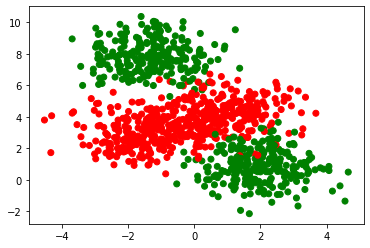

In [8]:
plt.scatter(data[:,0],data[:,1],c = labels, cmap = my_cmap)
plt.show()

### Train Test Split

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


# SN Classification

100%|██████████| 1000/1000 [00:29<00:00, 34.09epoch/s]


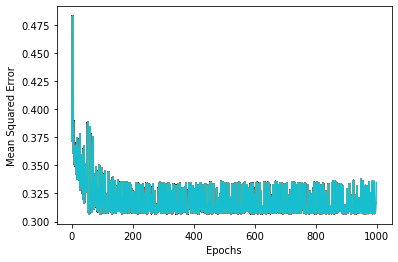

In [10]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.5, display_loss = True)

In [11]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= .5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= .5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training Accuracy", round(accuracy_train,2))
print("Validation Accuracy", round(accuracy_val,2))

Training Accuracy 0.65
Validation Accuracy 0.58


**Now we will plot the values and check if the model is predicting is correctly or not**

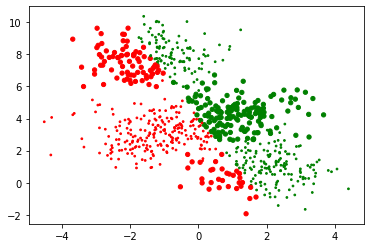

In [12]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap,
           s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

In the above plot we notice that the model is trying to seperate it linearly.

We chose the color as **"Y_pred_binarised_train"** so that we can see what the model is predicting. 

The size of the point indicate how **Wrong** it is.
    A **bigger** dot is **incorrect** prediction
    A **smaller** dot is **correct** prediction
    
**Key takeaways:**

    1.Sigmoid Neurons can only classify linearly seperable data.
    2.It will try its best to minimise the loss when a non linearly seperable data is fed in.
   

In [13]:
class FirstFFNetwork:
    
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3

    def grad(self, x, y):
        self.forward_pass(x)

        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)

        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)

    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):

        # initialise w, b
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
        
        if display_loss:
            loss = []
            
        for i in tqdm(range(epochs),total = epochs, unit = "epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
          
            if display_loss:
                Y_pred = self.predict(X)
                loss.append(mean_squared_error(Y_pred, Y))
        
        if display_loss:
            plt.plot(loss)
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

100%|██████████| 2000/2000 [01:15<00:00, 26.65epoch/s]


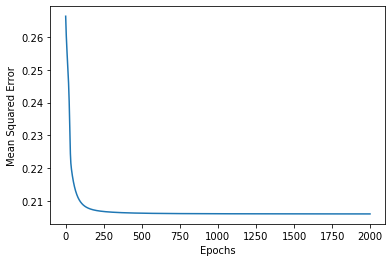

In [14]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs = 2000, learning_rate = 0.01,display_loss = True)

In [15]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.67
Validation accuracy 0.66


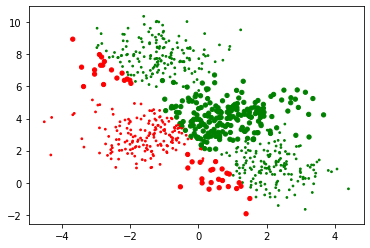

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train - Y_train) + 0.2))
plt.show()

# Feed Forward Network - Generic Class

In [17]:
class FFSNNetwork:
    
    def __init__(self, n_inputs, hidden_sizes = [2]):
        
        #no. of inputs
        self.nx = n_inputs 
        
        #no. of ouputs
        self.ny = 1 
        
        #no. of hidden layer
        self.nh = len(hidden_sizes) 
        
        #total number of parameters reqd form Layer 0 to Layer nh + 1(Refer image)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        #W and B are dictionaries
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            # W[i+1] (i+1 =1) size = no. of neurons in the current layer as rows and no. of neurons in the next layer as cols
            self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
            self.B[i+1] = np.zeros([1,self.sizes[i+1]])
            
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        
        # A is a dictionary containing all the pre-activation values
        self.A = {} 
        
        # H is a dictionary containing all the activated values
        self.H = {}
        
        # Since the first layer takes in inputs 
        # We define H[0] as the input. Reshaped(1,-1) means 1 row and any number of columns.
        self.H[0] = x.reshape(1, -1)
        
        #Iterate through each layer and calculate  A and H for each layer
        for i in range(self.nh+1):
            # A = H*W + B
            self.A[i+1] = np.matmul(self.H[i],self.W[i+1] + self.B[i+1])
            
            # H = sigmoid(A)
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1] #Returning the sigmoid of the output layer
    
    def grad_sigmoid(self,x):
        return x * (1-x)

    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
    def fit(self, X, Y, epochs = 1,initiatlise = True, learning_rate = 0.01, display_loss = False):
        
        if initiatlise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
                self.B[i+1] = np.zeros([1,self.sizes[i+1]])
        
        if display_loss:
            loss = []
        
        for epoch in tqdm(range(epochs), total = epochs, unit = "epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i],self.sizes[i+1]))
                dB[i+1] = np.zeros([1,self.sizes[i+1]])
            for x,y in zip(X,Y):
                self.grad(x,y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * (dW[i+1]/m)
                self.B[i+1] -= learning_rate * (dB[i+1]/m)
            
            if display_loss:
                Y_pred = self.predict(X)
                loss.append(mean_squared_error(Y_pred, Y))
        if display_loss:
            plt.plot(loss)
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

100%|██████████| 1000/1000 [01:25<00:00, 11.64epoch/s]


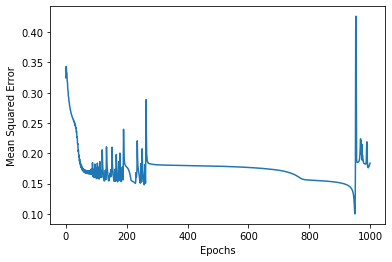

In [18]:
ffsnn = FFSNNetwork(2,[2,3])
ffsnn.fit(X_train,Y_train, epochs =1000,learning_rate = 0.01, display_loss = True)

# Multiclass classification with Forward Feed Network

In [19]:
class FFSN_MultiClass:
    
    def __init__(self, n_inputs, n_outputs, hidden_sizes = [3]):
        self.nx = n_inputs
        self.ny = n_outputs
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        self.W = {}
        self.B = {}
        
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
            self.B[i+1] = np.zeros([1,self.sizes[i+1]])
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x)
        return exps/np.sum(exps)
    
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1,-1)
        
        for i in range(self.nh):
            self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
            
        #For output layer we have to use the SOFTMAX function
        self.A[self.nh+1] = np.matmul(self.H[self.nh],self.W[self.nh+1]) + self.B[self.nh+1]
        self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
        return self.H[self.nh+1]
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()
    
    def grad_sigmoid(self, x):
        return x * (1-x)
    
    def cross_entropy(self, label, pred):
        yl = np.multiply(pred, label)
        yl = yl[yl!=0] #Zero values do not contribute to the sum
        yl = -np.log(yl)
        yl = np.mean(yl)
        return yl
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
        
    def fit(self, X, Y, epochs = 1000, learning_rate = 0.01, initialise = True, display_loss = False):
        if display_loss:
            loss = []
        
        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
                self.B[i+1] = np.zeros([1,self.sizes[i+1]])
            
        for epoch in tqdm(range(epochs), total = epochs, unit = "epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros([self.sizes[i],self.sizes[i+1]])
                dB[i+1] = np.zeros([1,self.sizes[i+1]])
            for x,y in zip(X,Y):
                self.grad(x,y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                
            m = X.shape[1]
                
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * (dW[i+1]/m)
                self.B[i+1] -= learning_rate * (dB[i+1]/m)
                
            if display_loss:
                Y_pred = self.predict(X)
                loss.append(self.cross_entropy(Y,Y_pred))
                    
        if display_loss:
            plt.plot(loss)
            plt.xlabel("Epochs")
            plt.ylabel("C.E")
            plt.show()        

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify= labels_orig, random_state = 0)
print(X_train.shape,X_val.shape,labels_orig.shape)

(750, 2) (250, 2) (1000,)


We use **OneHotEncoder()** to the following

    Say we have output labels as [0,1,2,3] we have to encode the output into a way understandable by the class.
    The encoding is done as follows:
        
        0 -> [1,0,0,0]
        1 -> [0,1,0,0]
        2 -> [0,0,1,0]
        3 -> [0,0,0,1]
    
    
    

In [21]:
enc = OneHotEncoder() 
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(Y_OH_train.shape,Y_OH_val.shape)

(750, 4) (250, 4)


#### Encoded Data

In [22]:
print(Y_OH_train,Y_OH_val)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]] [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1.

100%|██████████| 2000/2000 [02:55<00:00, 11.42epoch/s]


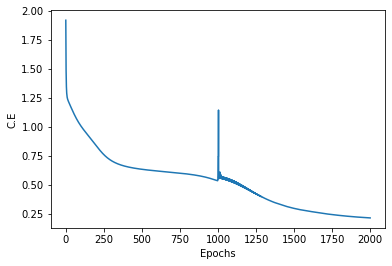

In [23]:
ffsn_multi = FFSN_MultiClass(2,4,[2,3])
ffsn_multi.fit(X_train, Y_OH_train, epochs = 2000, learning_rate = 0.001, display_loss = True)

In [29]:
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val, 1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.92
Validation accuracy 0.94


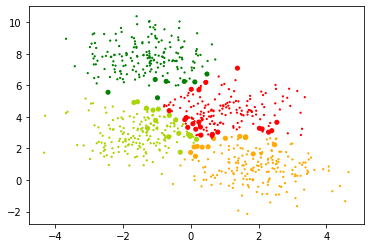

In [32]:
plt.scatter(X_train[:,0],X_train[:,1], c= Y_pred_train, cmap = my_cmap, s = 15*(np.abs(np.sign(Y_pred_train -Y_train))+.1))

# Excercise

In [33]:
from sklearn.datasets import make_moons, make_circles

data, labels = make_moons(n_samples=1000, random_state=0, noise=0.2)
print(data.shape, labels.shape)

(1000, 2) (1000,)


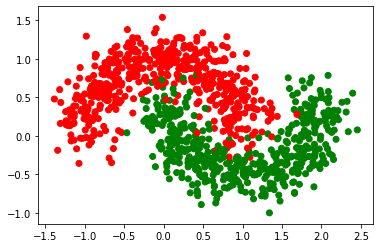

In [35]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [36]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


100%|██████████| 1000/1000 [01:23<00:00, 12.04epoch/s]


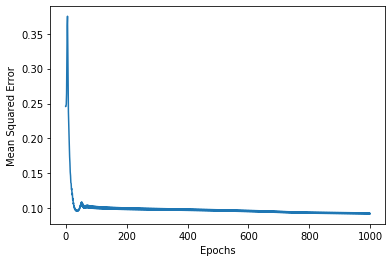

In [37]:
ffsnn = FFSNNetwork(2,[2,3])
ffsnn.fit(X_train,Y_train, epochs =1000,learning_rate = 0.01, display_loss = True)

In [38]:
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.87
Validation accuracy 0.87


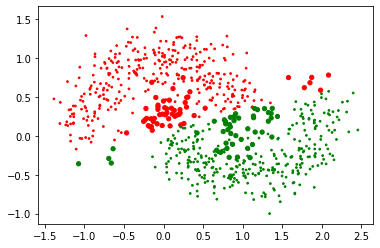

In [39]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap,
           s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

##### Circle dataset

In [40]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.1, factor=0.6)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [46]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


100%|██████████| 3000/3000 [04:48<00:00, 10.40epoch/s]


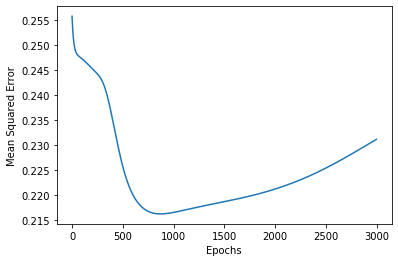

In [56]:
ffsnn = FFSNNetwork(2,[3,5])
ffsnn.fit(X_train,Y_train, epochs =3000,learning_rate = 0.003, display_loss = True)

In [57]:
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.61
Validation accuracy 0.54


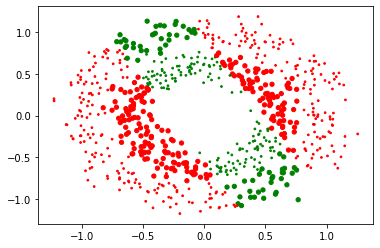

In [58]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap,
           s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()